# 0.0 IMPORTS

In [79]:
import pandas as pd
import numpy as np
import inflection
import seaborn as sns
import matplotlib.pyplot as plt 

## 0.1 Loading Data

In [8]:
path = 'C:/Users/edils/repos/pa004_health_insurance/data/'

In [9]:
df_raw = pd.read_csv(path + 'train.csv')

## 0.2 Helper Functions

# 1.0 DATA DESCRIPTION

In [11]:
df1 = df_raw.copy()

## 1.1 Rename Columns

In [22]:
cols_old = df1.columns

cols_new = []
cols_new = cols_old.map(lambda x: inflection.underscore(x))

df1.columns = cols_new

## 1.2 Data Dimension

In [29]:
df1.shape

(381109, 12)

## 1.3 Data Types

In [30]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

## 1.4 Check NA 

In [34]:
df1.isna().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

## 1.5 Descriptive Statistics

In [36]:
numerical_attributes = df1.select_dtypes(include=['int64', 'float64'])
categorical_attributes = df1.select_dtypes(exclude=['int64', 'float64'])

### 1.5.1 Numerical Attributes

In [68]:
#Dispersion - std, min, max, range, skew, kurtosis + #Central Tendency - mean, median
disp = numerical_attributes.agg(['std','mean','median','min','max',lambda x: x.max()-x.min(),'skew','kurtosis']).T.reset_index()
disp = disp.rename(columns={'index': 'attributes', '<lambda>': 'range'})

In [70]:
disp

,attributes,std,mean,median,min,max,range,skew,kurtosis
0,id,110016.836208,190555.000000,190555.0,1.0,381109.0,381108.0,9.443274e-16,-1.200000
1,age,15.511611,38.822584,36.0,20.0,85.0,65.0,6.725390e-01,-0.565655
2,driving_license,0.046110,0.997869,1.0,0.0,1.0,1.0,-2.159518e+01,464.354302
3,region_code,13.229888,26.388807,28.0,0.0,52.0,52.0,-1.152664e-01,-0.867857
4,previously_insured,0.498251,0.458210,0.0,0.0,1.0,1.0,1.677471e-01,-1.971871
5,annual_premium,17213.155057,30564.389581,31669.0,2630.0,540165.0,537535.0,1.766087e+00,34.004569
6,policy_sales_channel,54.203995,112.034295,133.0,1.0,163.0,162.0,-9.000081e-01,-0.970810
7,vintage,83.671304,154.347397,154.0,10.0,299.0,289.0,3.029517e-03,-1.200688
8,response,0.327936,0.122563,0.0,0.0,1.0,1.0,2.301906e+00,3.298788


### 1.5.2 Categorical Attributes

In [72]:
categorical_attributes.columns

Index(['gender', 'vehicle_age', 'vehicle_damage'], dtype='object')

<Axes: xlabel='vehicle_damage', ylabel='response'>

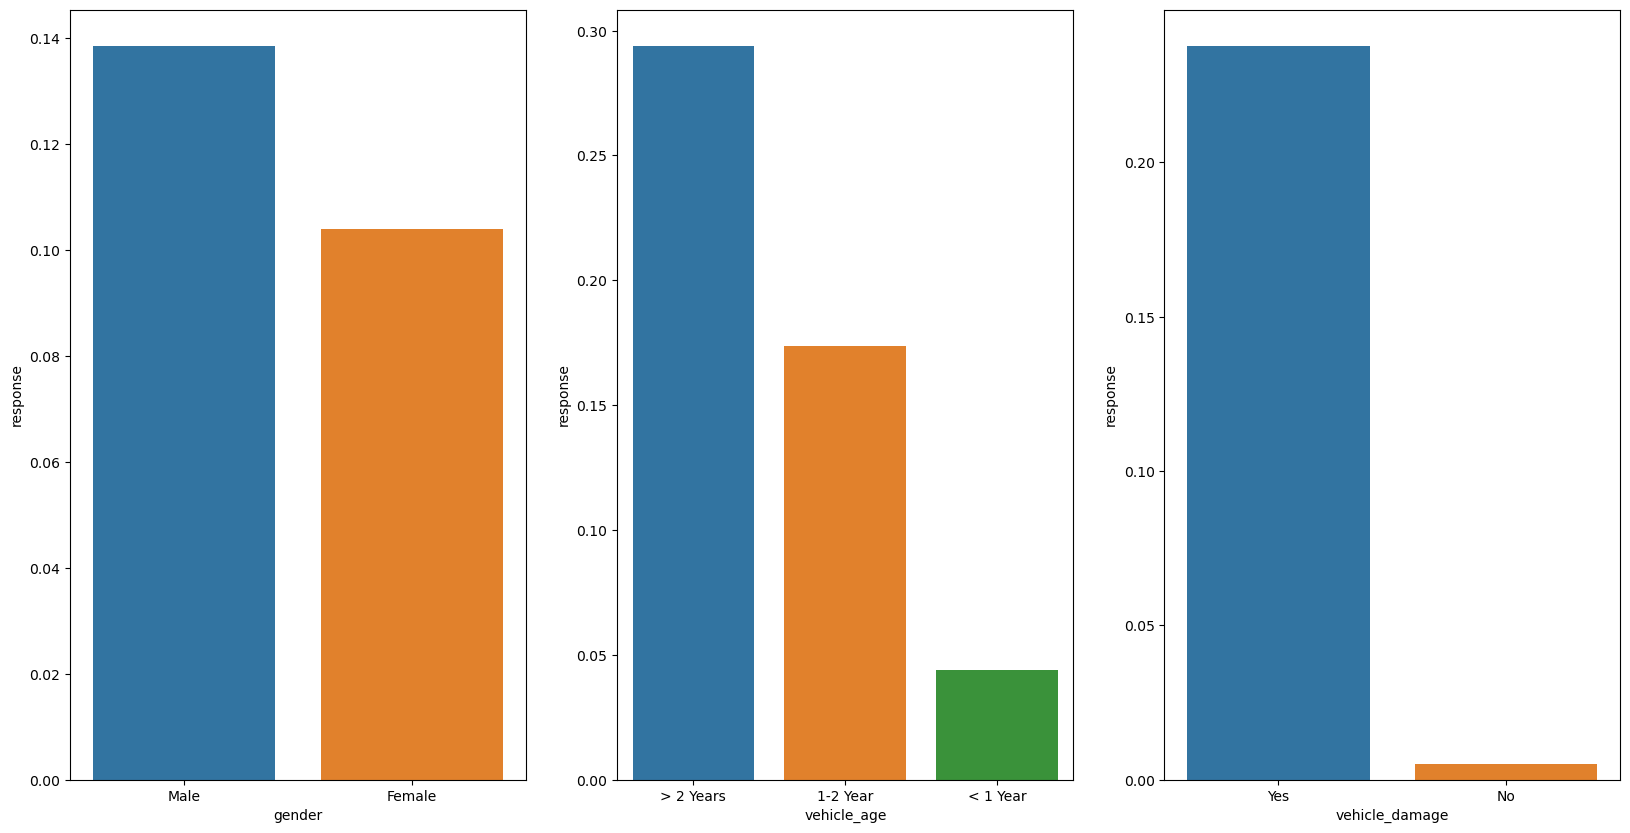

In [83]:

plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
sns.barplot(x='gender', y='response', data=df1, errorbar=None)

plt.subplot(1,3,2)
sns.barplot(x='vehicle_age', y='response', data=df1, errorbar=None)

plt.subplot(1,3,3)
sns.barplot(x='vehicle_damage', y='response', data=df1, errorbar=None)


# 2.0 FEATURE ENGINEERING

## 2.1 Hypothesis

1. Pessoas que já possuem um seguro de saúde podem estar mais inclinadas a adquirir um seguro de veículo, pois já têm experiência com seguros.
2. Clientes que possuem um histórico de acidentes de carro podem estar mais interessados em um seguro de veículo.
3. Clientes que possuem um carro mais novo são mais prováveis de adquirirem o seguro.
4. A idade do cliente pode ser um fator importante, com os clientes mais jovens sendo menos propensos a adquirir um seguro de veículo.
5. A localização geográfica dos clientes pode ser um fator importante, com as pessoas que moram em áreas com altos índices de roubos de veículos sendo mais propensas a adquirir um seguro de veículo.
6. O gênero do cliente pode ser um fator, com homens sendo mais propensos a adquirir um seguro de veículo.
7. Clientes que já possuem seguro de veículo com outra empresa são menos propensos a adquirir o seguro da compania.
8. O preço do seguro de veículo pode ser um fator importante, com clientes mais propensos a adquirir um seguro de veículo se os preços estiverem competitivos.
9. Clientes com CNH são mais propensos a adquirirem o seguro.

## 2.2 Feature Engineering

In [118]:
df2 = df1.copy()

In [121]:
df2.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,1,44,1,28.0,0,old,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,used,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,old,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,new,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,new,0,27496.0,152.0,39,0


In [120]:
#Renaming vehicle_age lines
#< 1 Year = new || 1-2 Years = used || >2 Years = old
df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x: 'old' if x == '> 2 Years' else 'used' if x == '1-2 Year' else 'new')

#Renaming vehicle_damage
df2['vehicle_damage'] = df2['vehicle_damage'].apply(lambda x: 1 if x=='Yes' else 0)

#Renaming gender #Male = 1, Female = 0
df2['gender'] = df2['gender'].apply(lambda x: 1 if x=='Male' else 0)

In [122]:
    df2.sample(15).T

,256571,238755,41892,180183,79272,99951,169946,239034,314250,112749,128572,103891,251354,363886,47743
id,256572,238756,41893,180184,79273,99952,169947,239035,314251,112750,128573,103892,251355,363887,47744
gender,1,1,1,1,1,1,0,0,1,1,1,1,0,1,0
age,31,45,22,46,45,55,42,27,25,23,25,52,25,20,56
driving_license,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
region_code,35.0,41.0,41.0,41.0,28.0,28.0,28.0,21.0,45.0,30.0,33.0,46.0,8.0,46.0,3.0
previously_insured,0,0,0,0,0,1,0,1,1,1,1,0,1,1,1
vehicle_age,new,used,new,used,old,used,old,new,new,new,new,used,new,new,used
vehicle_damage,1,1,1,1,1,0,1,0,0,0,0,1,0,0,0
annual_premium,25613.0,38077.0,40400.0,35171.0,55602.0,2630.0,35951.0,24964.0,28661.0,25523.0,48428.0,2630.0,66607.0,38222.0,27252.0
policy_sales_channel,152.0,26.0,152.0,124.0,26.0,26.0,122.0,152.0,152.0,152.0,151.0,124.0,152.0,160.0,26.0


# 3.0 VARIABLE FILTERING

In [123]:
df3 = df2.copy()

In [129]:
df3.head()

,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,44,1,28.0,0,old,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,used,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,old,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,new,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,new,0,27496.0,152.0,39,0


In [128]:
df3 = df3.drop(columns=['id'])

# 4.0 EXPLORATORY DATA ANALYSIS

In [130]:
df4 = df3.copy()

In [131]:
df4.head()

,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,44,1,28.0,0,old,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,used,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,old,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,new,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,new,0,27496.0,152.0,39,0


## 4.1 Unilateral Analysis

### 4.1.1 Numerical Variables

C:\Users\edils\AppData\Local\Temp\ipykernel_17804\4039046104.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  numerical_attributes.hist(ax = ax, bins=25);


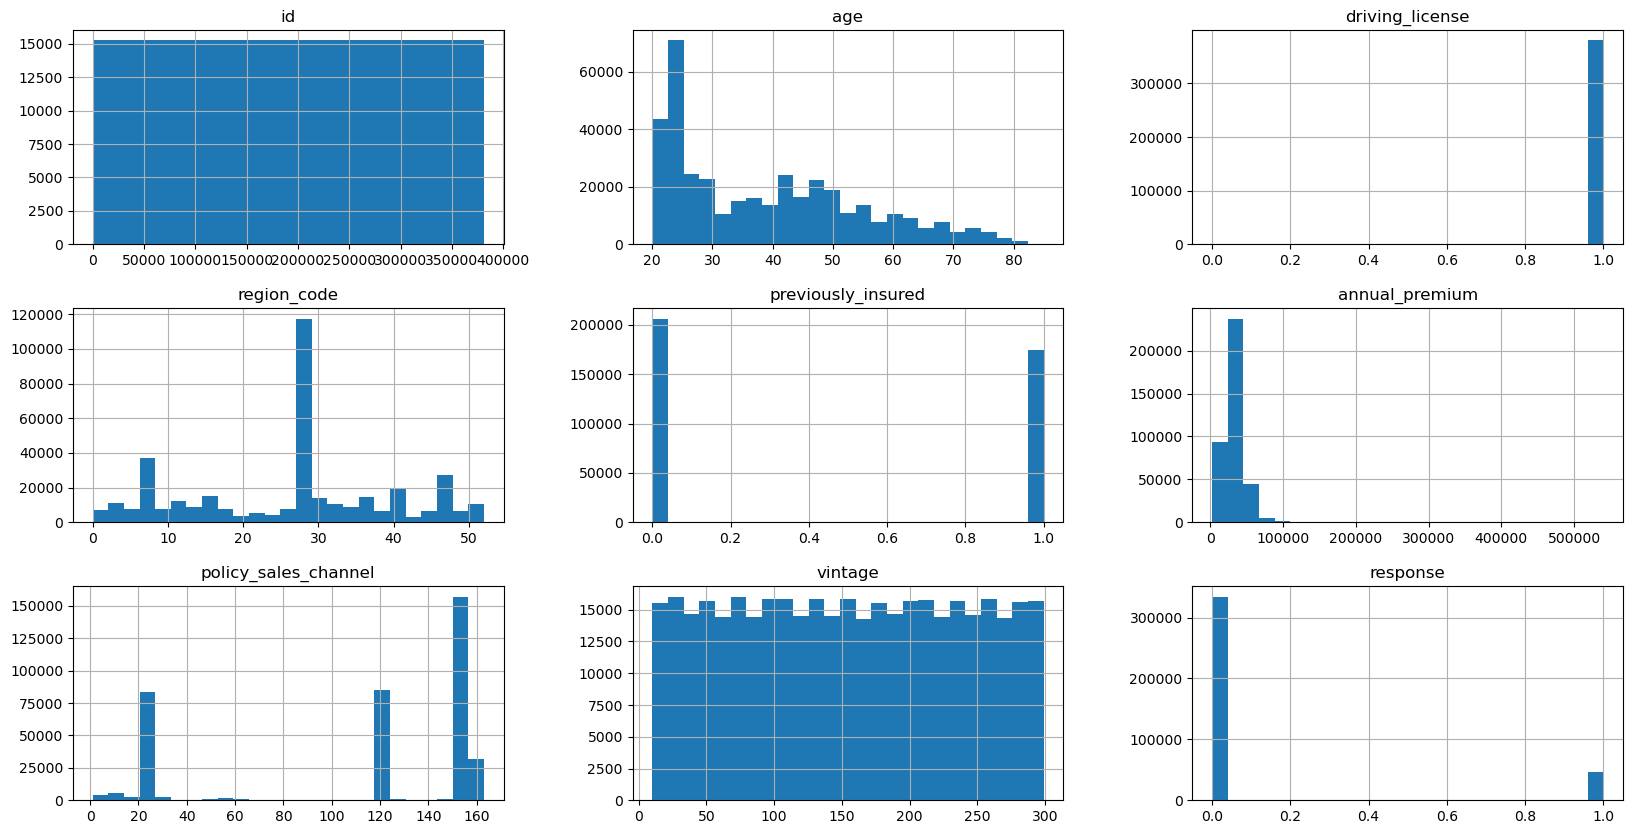

In [157]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca()
numerical_attributes.hist(ax = ax, bins=25);

### 4.1.2 Categorical Variables

In [142]:
categorical_attributes.columns

Index(['gender', 'vehicle_age', 'vehicle_damage'], dtype='object')

<Axes: xlabel='vehicle_damage', ylabel='count'>

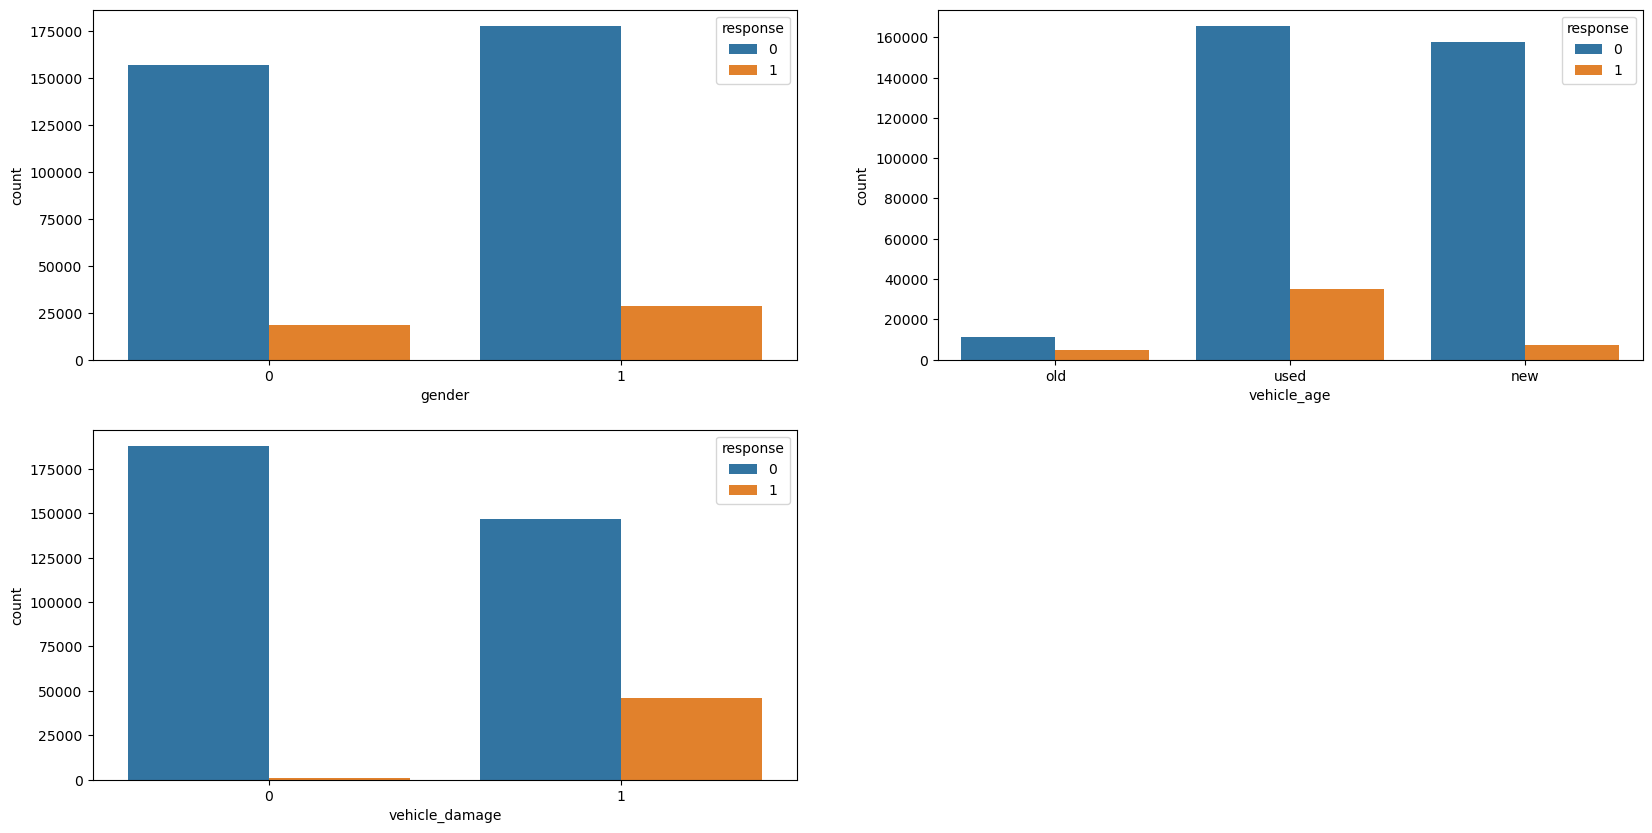

In [150]:
plt.figure(figsize=(20,10))

#gender
plt.subplot(2,2,1)
sns.countplot(data=df4, x='gender', hue='response')

#vehicle_age
plt.subplot(2,2,2)
sns.countplot(data=df4, x='vehicle_age', hue='response')

#vehicle_damage
plt.subplot(2,2,3)
sns.countplot(data=df4, x='vehicle_damage', hue='response')


## 4.2 Bilateral Analysis

### 4.2.1 H1 - Pessoas que já possuem um seguro de saúde podem estar mais inclinadas a adquirir um seguro de veículo, pois já têm experiência com seguros.